#### MSDS 7331: Lab 2 - Classification 
#### Team: Scott Anderwald, Marvin Scott, Salomon Gilles, Earl Shaw 
#### Bank Marketing Data 
#### March 12, 2017


### Data Set Insight
In this project, our objective is to build a classification model using data from several direct marketing campaigns carried out by a Portuguese bank to class whether or not the current bank customer will sign up for a term deposit, i.e an investment product designed to provide the customer with a specified amount of interest on their cash deposit. This classification model could potentially assist bank representatives in prioritizing which customers to contact. That is, rather than spend time contacting customers identified as not likely to sign up for the term deposit, they can direct their attention to only those customers likely to respond, thereby better utilizing their time and resources. Two approaches will be used in building the models, namely: 'Logisitc Regression', and 'Support Vector Machines'.

The raw data represents data collected by a Portuguese bank over several direct marketing campaigns to its customers, primarily by phone. All customer contact was carried out by bank representatives without the aid of automated calls. Data from the campaigns was provided in a flat file report based on information used by the representatives during the call. There were a total of 17 campaigns executed between May 2008 and November 2010. The data set provided by the UCI Machine Learning Repository contained 41,188 records and 21 attributes including 1 target variable, which is represented in the raw data as 'y', with values of 'yes' or 'no, indicating whether or not the customer signed up for the investment product. Furthermore, each observation in the data set represents a customer contacted during a campaign. Given the possibility of duplicate contacts, the only duplicate records removed were those in which all attributes contained the same information, which will not affect training a model to classify the target variable. Additionally, it seems unlikely that a customer would have been contacted more than once and each attribute had the same value. For example, if on the first call, the bank representative spoke with the customer for 5 minutes, it doesn't seem reasonable that on a second or third call, the contact duration also lasted 5 minutes, along with other variables remaining static that could potentially change. This, along with other situations lead to the removal of duplicates of this sort. Also, as noted in several box plots provided in Lab 1, outliers don't appear to be an issue and won't have an impact on classification performance of the model.

#### Sources:
1. http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
2. S. Moro, P. Cortez, P. Rita. "A Data-Driven Approach to Predict the Success of Bank Telemarketing". Decision Support Systems, Elsevier, 62:22-31, June 2014. http://bru-unide.iscte.pt/RePEc/pdfs/13-06.pdf

### Loading Raw Data

In [33]:
# Loading relevant libraries used throughout the analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
#from sklearn.svm import LinearSVC
#from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

#Loading the "bank_data.csv" file
bank=pd.read_csv('C:\\Users\\Marvin\\bank-data.csv')
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 21 columns):
age               4120 non-null int64
job               4120 non-null object
marital           4120 non-null object
education         4120 non-null object
default           4120 non-null object
housing           4120 non-null object
loan              4120 non-null object
contact           4120 non-null object
month             4120 non-null object
day_of_week       4120 non-null object
duration          4120 non-null int64
campaign          4120 non-null int64
pdays             4120 non-null int64
previous          4120 non-null int64
poutcome          4120 non-null object
emp.var.rate      4120 non-null float64
cons.price.idx    4120 non-null float64
cons.conf.idx     4120 non-null float64
euribor3m         4120 non-null float64
nr.employed       4120 non-null float64
y                 4120 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 676.0+ KB


### Verifying Data Quality

As mentioned prior, outliers are not an issue that will impact training a model using the raw data. However, for the continuous variable, 'pdays', which represents the number of days since the customer was last contacted for a previous campaign, for records in which the customer was not contacted in a previous campaign, the value was coded as '999'. This represents ~96% of the observations for this variable. Due to this high amount of irregular values the feature will be removed from the dataset. Also, duplicates will be removed in which all attributes of an observation contain identical values to other observations. This will not have an impact on the classification model, but is primarily done to eliminate redundancies in the data. 11 observations with duplicates are removed, leaving 41,176 observations for model development. Additionally, missing values will not compromise the analysis, as all values are populated.41,188 observations are initially available prior to data transformations, processing, etc. 20 features and 1 target variable with class labels useful for training a model are included in the data.

In [34]:
# Checking any possible missing values
print ('Missing Values:'),np.count_nonzero(bank.isnull())
# np.count_nonzero(bank['age'].isnull())
# np.count_nonzero(bank['job'].isnull())
# np.count_nonzero(bank['marital'].isnull())
# np.count_nonzero(bank['education'].isnull())
# np.count_nonzero(bank['default'].isnull())
# np.count_nonzero(bank['housing'].isnull())
# np.count_nonzero(bank['loan'].isnull())
# np.count_nonzero(bank['contact'].isnull())
# np.count_nonzero(bank['month'].isnull())
# np.count_nonzero(bank['day_of_week'].isnull())
# np.count_nonzero(bank['duration'].isnull())
# np.count_nonzero(bank['campaign'].isnull())
# np.count_nonzero(bank['pdays'].isnull())
# np.count_nonzero(bank['previous'].isnull())
# np.count_nonzero(bank['poutcome'].isnull())
# np.count_nonzero(bank['emp.var.rate'].isnull())
# np.count_nonzero(bank['cons.price.idx'].isnull())
# np.count_nonzero(bank['cons.conf.idx'].isnull())
# np.count_nonzero(bank['euribor3m'].isnull())
# np.count_nonzero(bank['nr.employed'].isnull())
# np.count_nonzero(bank['y'].isnull())

Missing Values:


(None, 0)

In [35]:
# Removing duplicate observations/clients from dataset
bank2=bank.drop_duplicates()
bank2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119 entries, 0 to 4119
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 708.0+ KB


In [36]:
# Changing variable names to avoid syntax issues within the Python operating environment and to more intuitive names.
# Removing variable "pdays" considering roughly 96% of the observations have the value '999'
bank3=bank2.rename(columns={'job':'job_type','marital':'marital_status','education':'education_level','pdays':'days_since_last_contact',
                            'default':'curr_credit_default','housing':'curr_housing_loan','contact':'contact_type',
                            'loan':'curr_personal_loan','month':'last_contact_month','day_of_week':'last_contact_day',
                            'previous':'num_contacts_pre_campaign',
                            'poutcome':'prior_campaign_outcome','emp.var.rate':'emp_var_rate','campaign':'num_campaign_contacts',
                            'cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','nr.employed':'num_employees_qtr','y':'target'})
# New variable names:
# -------------------
# age = age
# job = job_type
# marital = marital_status
# education  = education_level
# default = curr_credit_default
# housing = curr_housing_loan
# loan = curr_personal_loan
# contact = contact_type
# month = last_contact_month
# day_of_week = last_contact_day
# duration = duration
# campaign = num_campaign_contacts
# previous = num_contacts_pre_campaign
# pdays = days_since_last_contact
# poutcome = prior_campaign_outcome
# emp.var.rate = emp_var_rate
# cons.price.idx = cons_price_idx
# euribor3m = euribor3m
# nr.employed = num_employees_qtr
# y = target
#bank3a=bank3.drop('pdays',axis=1)
bank3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119 entries, 0 to 4119
Data columns (total 21 columns):
age                          4119 non-null int64
job_type                     4119 non-null object
marital_status               4119 non-null object
education_level              4119 non-null object
curr_credit_default          4119 non-null object
curr_housing_loan            4119 non-null object
curr_personal_loan           4119 non-null object
contact_type                 4119 non-null object
last_contact_month           4119 non-null object
last_contact_day             4119 non-null object
duration                     4119 non-null int64
num_campaign_contacts        4119 non-null int64
days_since_last_contact      4119 non-null int64
num_contacts_pre_campaign    4119 non-null int64
prior_campaign_outcome       4119 non-null object
emp_var_rate                 4119 non-null float64
cons_price_idx               4119 non-null float64
cons_conf_idx                4119 non-null flo

### Data Preparation - Part 1 (Salomon) 

Rubric: "Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis."

In order to accomplish the need to have two classification tasks, we chose to segment our data based on the variable "marital_status". One data set was created with observations in which the variable "marital_status"='married'; and another data set was created with observations in which the variable "marital_status" was not equal to 'married', i.e. observations in which "marital_status" was one of the following: "single", "divorced", or "unknown". The "married" data set represented 61% of our observations, while the "non_married" data set represented 39%. The "marital_status" variable was primarily chosen to base our segmentation on considering the split was relatively close to 50% for one group, and 50% for the other. We didn't want to segment on a feature in which a particular group wasn't adequately represented. Additionally, we transformed categorical variables into binary dummy variables with (1/0) values so they could be used as predictors in the classification model, and the target variable was transformed to contain 0's or 1's instead of the text values,  'yes' or 'no'. Also, in order to train the model on the segmented data sets, we had to isolate the target variable, 'y', in each data set from the training samples. Once the target variable was removed from the core data sets containing all features, we then transformed them from dataframes into arrays (i.e. numpy.ndarray) which contained all class labels needed to build the models. While two separate arrays, 'X_m' and 'X_nm', were created from the remaining dataframes containing the training samples. This format fits that desired by Scikit-Learn's 'KNeighborsClassifier' module (i.e. sklearn.neighbors.KNeighborsClassifier), its 'Linear Support Vector Classification' classifier, (i.e. sklearn.svm.LinearSVC), and its 'Random Forest Classifier', (i.e. sklearn.ensemble.RandomForestClassifier', which will all be used to train the classification models for each data set.

In [37]:
# Creating bins for age variable
bank3['age_range'] = pd.cut(bank3.age,[0,17,24,34,44,54,64,74,100],8,labels=['<=17','18-24','25-34','35-44','45-54','55-64','65-74','75+'])
bank3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119 entries, 0 to 4119
Data columns (total 22 columns):
age                          4119 non-null int64
job_type                     4119 non-null object
marital_status               4119 non-null object
education_level              4119 non-null object
curr_credit_default          4119 non-null object
curr_housing_loan            4119 non-null object
curr_personal_loan           4119 non-null object
contact_type                 4119 non-null object
last_contact_month           4119 non-null object
last_contact_day             4119 non-null object
duration                     4119 non-null int64
num_campaign_contacts        4119 non-null int64
days_since_last_contact      4119 non-null int64
num_contacts_pre_campaign    4119 non-null int64
prior_campaign_outcome       4119 non-null object
emp_var_rate                 4119 non-null float64
cons_price_idx               4119 non-null float64
cons_conf_idx                4119 non-null flo

### Correlation Revisited

We revisited the correlation heatmap provided in Lab 1 to be sure that any redundant features are located and removed before proceeding with training the classifier. If two or more features are strongly correlated (i.e. a Pearson Correlation Coefficient close to 1), only one of the features will remain in the training sample so the information provided by the feature is preserved, while any redundancy is eliminated. Additionally, any inputs that appear vague and may pose a challenge to interpret will be removed. The features: 'emp_var_rate' (correlation=0.97) and 'num_employees_qtr' (correlation=0.95) will be removed due to their strong correlation with 'euribor3m'.

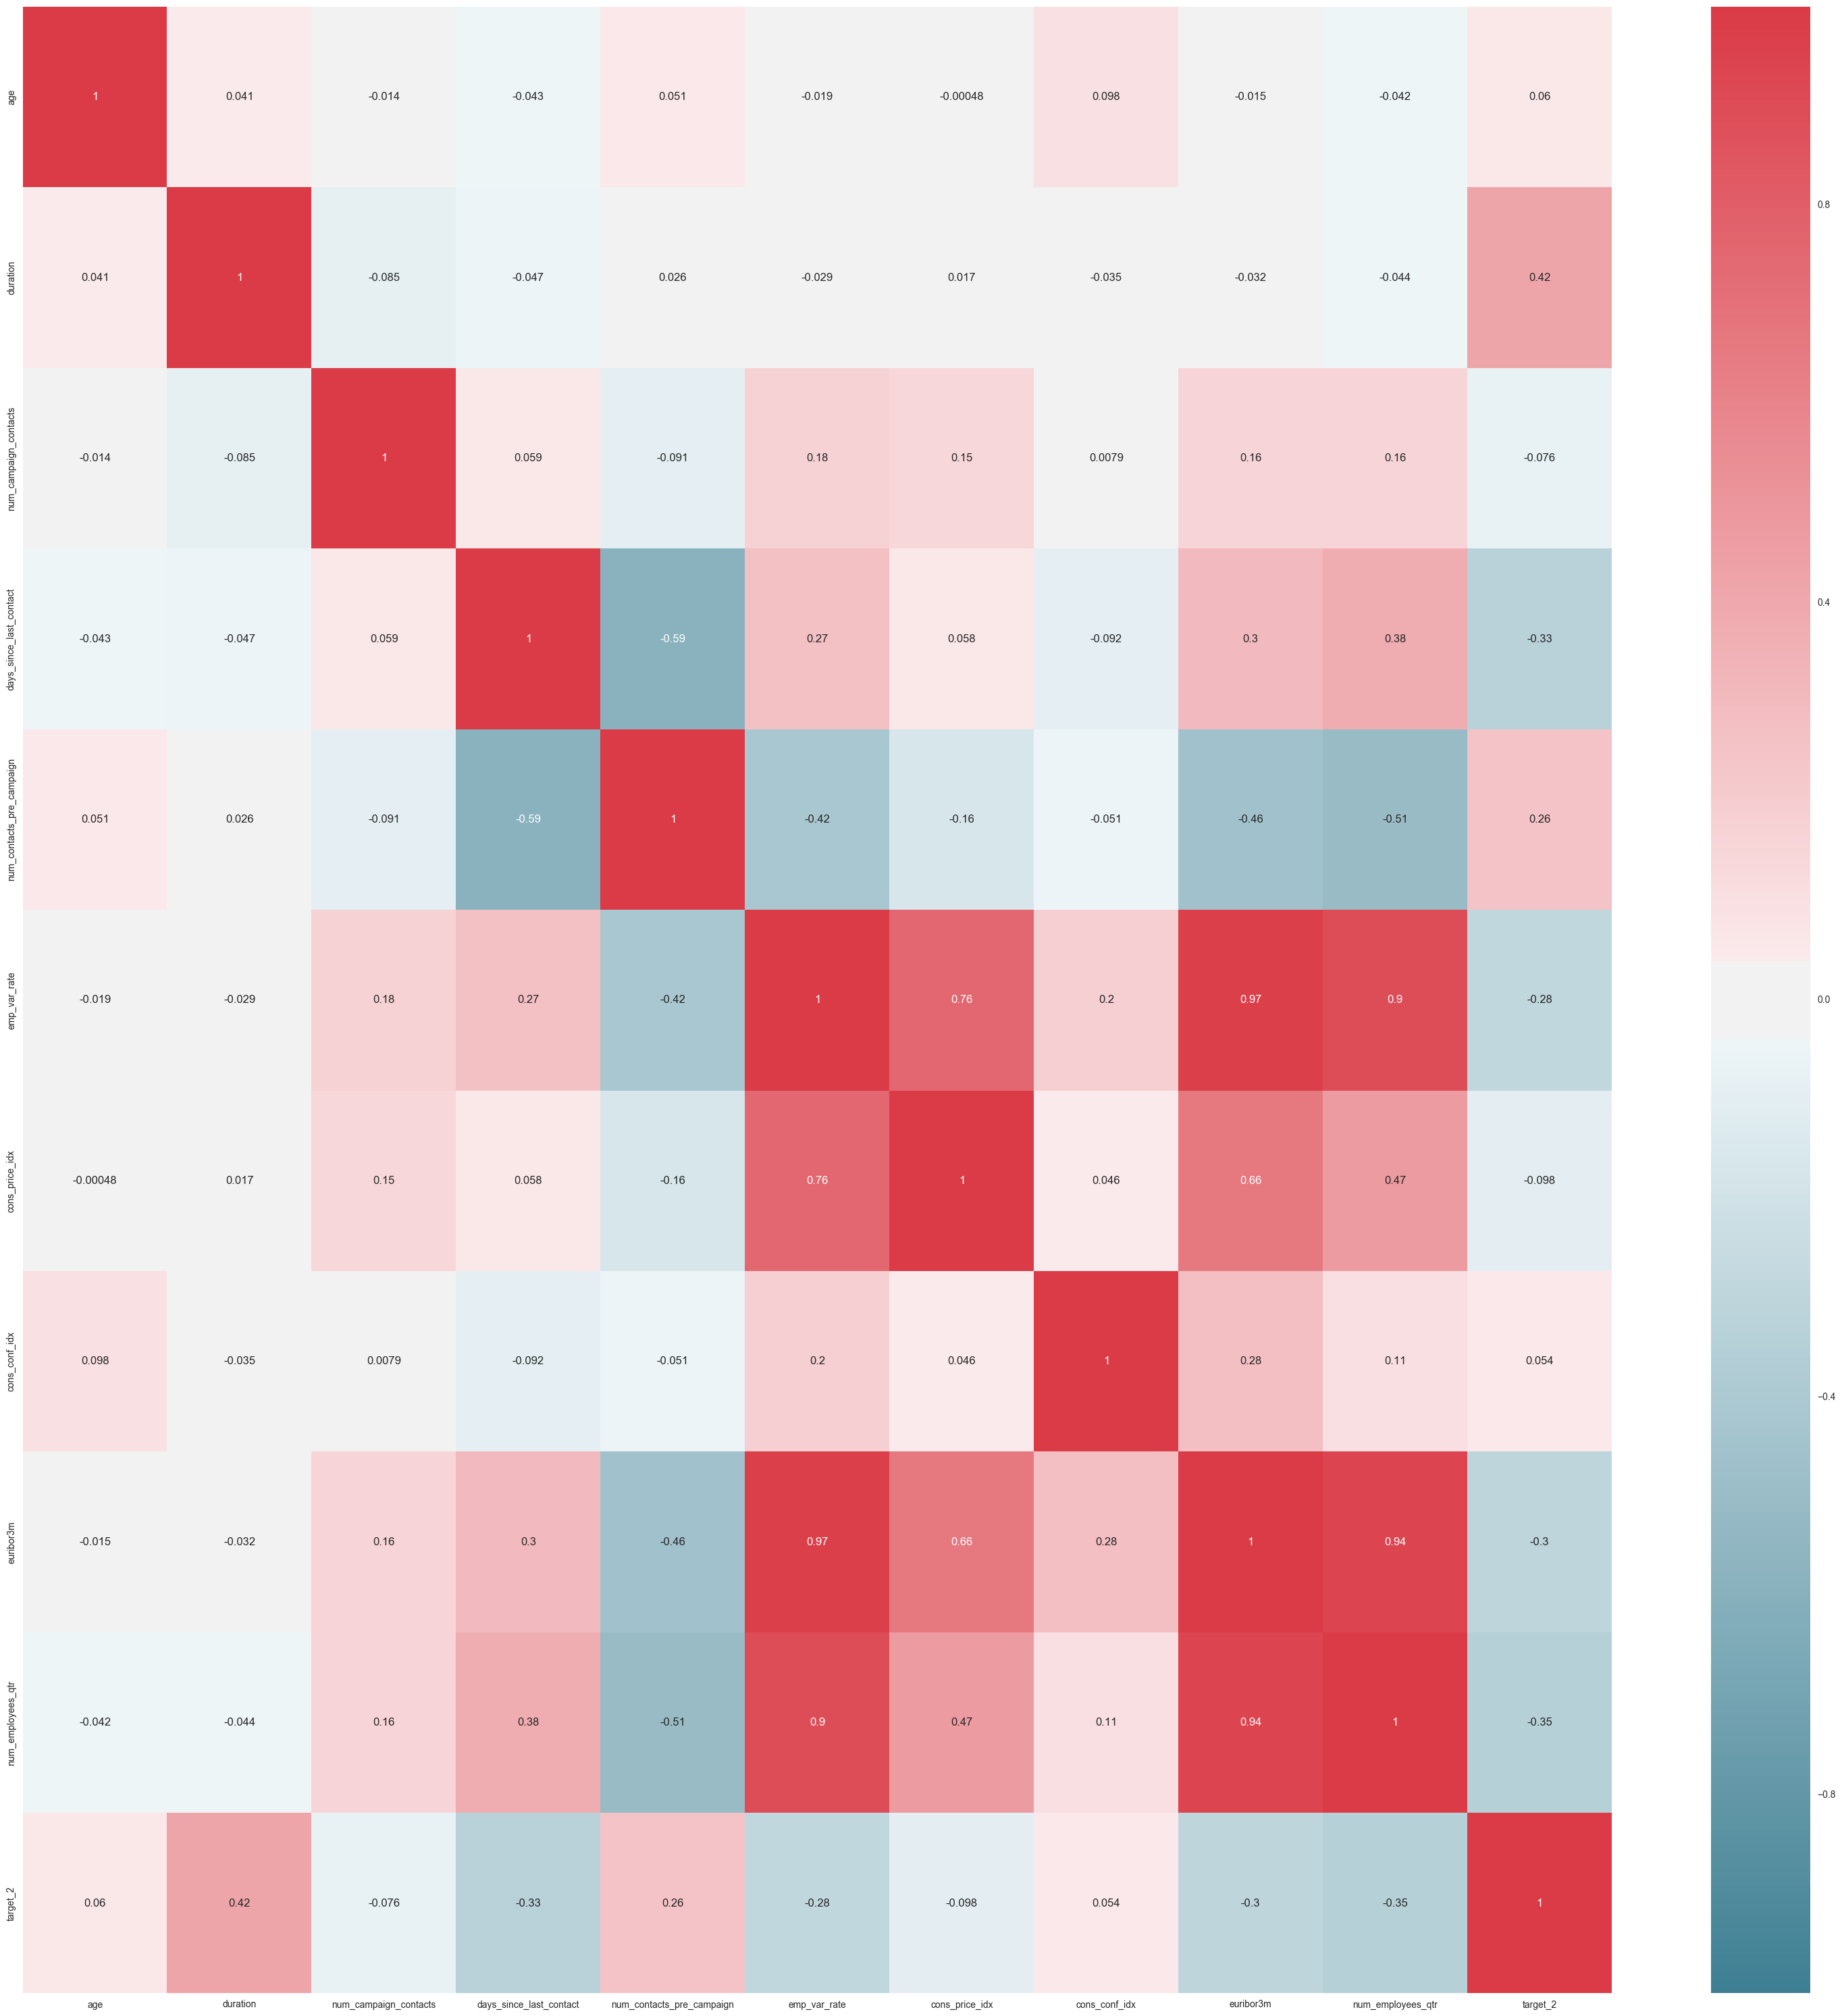

In [38]:
# Determining correlation among features and target variable
banking_b=bank3
target_2=[]
for row in banking_b['target']:
    if row=='yes':
        target_2.append(1)
    else:
        target_2.append(0)
banking_b['target_2']=target_2

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(style="darkgrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(30,30))
sns.heatmap(banking_b.corr(), cmap=cmap, annot=True)
f.tight_layout()

In [39]:
#Deleted column "target" because the data type can't be use for claffification modelling 
del bank3['target_2']
del bank3['num_employees_qtr']
del bank3['emp_var_rate']
del bank3['days_since_last_contact']
print (bank3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119 entries, 0 to 4119
Data columns (total 19 columns):
age                          4119 non-null int64
job_type                     4119 non-null object
marital_status               4119 non-null object
education_level              4119 non-null object
curr_credit_default          4119 non-null object
curr_housing_loan            4119 non-null object
curr_personal_loan           4119 non-null object
contact_type                 4119 non-null object
last_contact_month           4119 non-null object
last_contact_day             4119 non-null object
duration                     4119 non-null int64
num_campaign_contacts        4119 non-null int64
num_contacts_pre_campaign    4119 non-null int64
prior_campaign_outcome       4119 non-null object
cons_price_idx               4119 non-null float64
cons_conf_idx                4119 non-null float64
euribor3m                    4119 non-null float64
target                       4119 non-null o

In [40]:
#Segmenting data into two groups (i.e. 'married', and 'non-married') for two classification tasks
married=bank3.loc[bank3['marital_status'] == 'married']
married2=married.drop('marital_status',axis=1)
print (married2.info())
print ("Shape of 'married' data set:",married2.shape)
print ('')

non_married=bank3.loc[bank3['marital_status'] != 'married']
non_married2=non_married.drop('marital_status',axis=1)
print (non_married2.info())
print ("Shape of 'Non-Married' data set:",non_married2.shape)
print ('')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 0 to 4118
Data columns (total 18 columns):
age                          2509 non-null int64
job_type                     2509 non-null object
education_level              2509 non-null object
curr_credit_default          2509 non-null object
curr_housing_loan            2509 non-null object
curr_personal_loan           2509 non-null object
contact_type                 2509 non-null object
last_contact_month           2509 non-null object
last_contact_day             2509 non-null object
duration                     2509 non-null int64
num_campaign_contacts        2509 non-null int64
num_contacts_pre_campaign    2509 non-null int64
prior_campaign_outcome       2509 non-null object
cons_price_idx               2509 non-null float64
cons_conf_idx                2509 non-null float64
euribor3m                    2509 non-null float64
target                       2509 non-null object
age_range                    2509 non-null c

In [43]:
# Creating separate data frames for target variable.
target_m=married2[['target']].copy()
target_nm=non_married2[['target']].copy()

print ("Shape of 'target' for 'married' data:",target_m.shape)
print ("Shape of 'target' for 'non_married' data:",target_nm.shape)

# Transforming target variable 'target' into an array named 'y' to accomodate type needed for scikit-learn 'train_test_split' and classification algorithms, LR & L_SVC.
y_m=target_m.as_matrix()
print ('')
print ('type y_married')
print (y_m.shape)
print (y_m.dtype)
print ('')

y_nm=target_nm.as_matrix()
print ('')
print ('type y_non_married')
print (y_nm.shape)
print (y_nm.dtype)
print ('')

# Converting text values in the target variable 'y', i.e. 'yes'/'no' to 1/0.
y_m=np.where(y_m=='yes',1,0)
print ('')
print ('type y_married')
print (y_m.shape)
print (y_m.dtype)
print ('')

y_nm=np.where(y_nm=='yes',1,0)
print ('')
print ('type y_non_married')
print (y_nm.shape)
print (y_nm.dtype)
print ('')

# Flattening array 'y_m' and 'y_nm'
y_m=np.ravel(y_m)
print ('')
print ('type y_married')
print (y_m.shape)
print (y_m.dtype)
print ('')

y_nm=np.ravel(y_nm)
print ('')
print ('type y_non_married')
print (y_nm.shape)
print (y_nm.dtype)
print ('')

Shape of 'target' for 'married' data: (2509, 1)
Shape of 'target' for 'non_married' data: (1610, 1)

type y_married
(2509, 1)
object


type y_non_married
(1610, 1)
object


type y_married
(2509, 1)
int32


type y_non_married
(1610, 1)
int32


type y_married
(2509,)
int32


type y_non_married
(1610,)
int32



In [48]:
## Removing target variable 'target' from dataframes so that only training samples remain.
married3=married2.drop('target',axis=1)
non_married3=non_married2.drop('target',axis=1)

# Creating dummy variables from categorical variables
married4=pd.get_dummies(married3)
non_married4=pd.get_dummies(non_married3)

# Changing variable names to more Python friendly form.
married5=married4.rename(columns={'job_type_admin.':'job_type_admin','education_level_basic.4y':'education_level_basic_4y',
                            'education_level_basic.6y':'education_level_basic_6y','education_level_basic.9y':'education_level_basic_9y',
                            'education_level_high.school':'education_level_high_school','education_level_professional.course':'education_level_professional_course',
                            'education_level_university.degree':'education_level_university_degree','job_type_blue-collar':'job_type_blue_collar',
                            'job_type_self-employed':'job_type_self_employed','age_range_<=17':'age_range_lte_17','age_range_18-24':'age_range_18_24',
                            'age_range_25-34':'age_range_25_34','age_range_35-44':'age_range_35_44','age_range_45-54':'age_range_45_54',
                            'age_range_55-64':'age_range_55_64','age_range_65-74':'age_range_65_74','age_range_75+':'age_range_75p'})

non_married5=non_married4.rename(columns={'job_type_admin.':'job_type_admin','education_level_basic.4y':'education_level_basic_4y',
                            'education_level_basic.6y':'education_level_basic_6y','education_level_basic.9y':'education_level_basic_9y',
                            'education_level_high.school':'education_level_high_school','education_level_professional.course':'education_level_professional_course',
                            'education_level_university.degree':'education_level_university_degree','job_type_blue-collar':'job_type_blue_collar',
                            'job_type_self-employed':'job_type_self_employed','age_range_<=17':'age_range_lte_17','age_range_18-24':'age_range_18_24',
                            'age_range_25-34':'age_range_25_34','age_range_35-44':'age_range_35_44','age_range_45-54':'age_range_45_54',
                            'age_range_55-64':'age_range_55_64','age_range_65-74':'age_range_65_74','age_range_75+':'age_range_75p'})

print ('type married')
print (married5.shape)
print ('')

print ('type non_married')
print (non_married5.shape)
print ('')

# Converting data frames of training samples into array (i.e. np.ndarray), 'X_m' and 'X_nm'
X_m=married5.as_matrix()
print ('type X_m')
print (X_m.shape)
print (X_m.dtype)
# X_m2=np.matrix(X)
#print married5.info()
print ('')
X_nm=non_married5.as_matrix()
print ('type X_nm')
print (X_nm.shape)
print (X_nm.dtype)
# X_m2=np.matrix(X)
#print non_married5.info()

type married
(2509, 63)

type non_married
(1610, 63)

type X_m
(2509, 63)
float64

type X_nm
(1610, 63)
float64


### Data Preparation - Part 2 (Salomon)
Rubric: "Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created."

Text to be added...

### Modeling and Evaluation - Part 1 (Earl)
Rubric: "Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions."

In this section, a classification model will be developed using the 'Logistic Regression' module of Scikit-Learn based on the training samples represented by 'X' and the class labels represented by, 'y'. From Lab 1, it was determined that ~11.3% of the customers contacted actually signed up for the bank's investment product. To build the model an 80/20 training/testing split will be used. That is, 80% of our development data will be used to train the model, while the remaining 20% will be held out and used to gauge model accuracy.

### Modeling and Evaluation - Part 2 (Earl)
Rubric:"Text to be added...Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time."

### Splitting the data into training and test sets - 'Married' and 'Non-Married' data

In [49]:
# Splitting the 'married' data into a 'training set' and 'test set'.
X_train_m, X_test_m, y_train_m, y_test_m=train_test_split(X_m,y_m,test_size=0.20,random_state=0)
print ('Training set X_m:',X_train_m.shape)
print ('Training set y_m:',y_train_m.shape)
print ('')
print ('Test set X_m:',X_test_m.shape)
print ('Test set y_m:',y_test_m.shape)
print ('')

# Splitting the 'non_married' data into a 'training set' and 'test set'.
X_train_nm, X_test_nm, y_train_nm, y_test_nm=train_test_split(X_nm,y_nm,test_size=0.20,random_state=0)
print ('Training set X_nm:',X_train_nm.shape)
print ('Training set y_nm:',y_train_nm.shape)
print ('')
print ('Test set X_nm:',X_test_nm.shape)
print ('Test set y_nm:',y_test_nm.shape)

Training set X_m: (2007, 63)
Training set y_m: (2007,)

Test set X_m: (502, 63)
Test set y_m: (502,)

Training set X_nm: (1288, 63)
Training set y_nm: (1288,)

Test set X_nm: (322, 63)
Test set y_nm: (322,)


### Modeling and Evaluation - Part 3 (Scott/Earl)
Rubric: "Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!"

Text to be added...

Scaling features and applying Principal Component Analysis to remedy high dimensionality in our 'Married' data set

In [51]:
# Feature Scaling; don't need to worry about this for 'Random Forest'
from sklearn.preprocessing import StandardScaler
sc_m = StandardScaler()
X_train_sc_m = sc_m.fit_transform(X_train_m)
X_test_sc_m = sc_m.transform(X_test_m)

#Applying PCA
from sklearn.decomposition import PCA
pca_m = PCA(n_components = 6)
X_train_pca_m = pca_m.fit_transform(X_train_sc_m)
X_test_pca_m = pca_m.transform(X_test_sc_m)
explained_variance_pca_m = pca_m.explained_variance_ratio_
print ("Explained Variance from PCA, 'Married':",explained_variance_pca_m)
print ("Explained Variance from PCA Ratio, 'Married':",pca_m.explained_variance_ratio_)
print ("Explained Variance from PCA Ratio Sum, 'Married':",pca_m.explained_variance_ratio_.cumsum())

Explained Variance from PCA, 'Married': [ 0.07422905  0.04882593  0.04431823  0.03812304  0.03693472  0.03210683]
Explained Variance from PCA Ratio, 'Married': [ 0.07422905  0.04882593  0.04431823  0.03812304  0.03693472  0.03210683]
Explained Variance from PCA Ratio Sum, 'Married': [ 0.07422905  0.12305498  0.16737321  0.20549625  0.24243097  0.2745378 ]


### Following is SVC, KNN, And Random Forest Models for 'Married' data set

SVC - 'Married' data

In [86]:
# Applying classifier SVC to Training set on 'Married' data
from sklearn.svm import SVC
classifier_svc_m = SVC(kernel = 'rbf', random_state = 0)
classifier_svc_m.fit(X_train_pca_m, y_train_m)

# Predicting the Test set results
y_pred_svc_m = classifier_svc_m.predict(X_test_pca_m)

#y_pred_svc_m1 = classifier_svc_m.predict(X_test_pca_m)
#y_pred_svc_m2 = classifier_svc_m.predict(X_test_pca_m)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svc_m = confusion_matrix(y_test_m, y_pred_svc_m)
#cm_svc_m1 = confusion_matrix(y_test_m1, y_pred_svc_m1)
#cm_svc_m2 = confusion_matrix(y_test_m2, y_pred_svc_m2)

#Classification Report
from sklearn.metrics import classification_report
cr_svc_m = classification_report(y_test_m, y_pred_svc_m)
#cr_svc_m1 = classification_report(y_test_m1, y_pred_svc_m1)
#cr_svc_m2 = classification_report(y_test_m2, y_pred_svc_m2)

#ROC Curve

Support Vector Machine - Confusion Matrix and Heatmap, 'Married' data

Confusion Matrix, 'Married':
[[445   8]
 [ 44   5]]



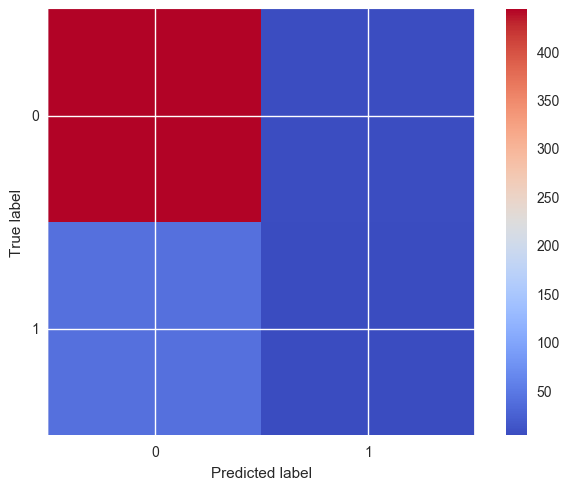

In [87]:
print ("Confusion Matrix, 'Married':")
print (cm_svc_m)
print ('')
plt.imshow(confusion_matrix(y_test_m, y_pred_svc_m), cmap="coolwarm", interpolation="None")
plt.colorbar()
plt.xlabel("Predicted label")
plt.xticks(range(2))
plt.yticks(range(2))
plt.ylabel("True label")

Support Vector Machines - Classification Report and ROC Curve, 'Married' data

Classifcation Report, 'Married':
             precision    recall  f1-score   support

          0       0.91      0.98      0.94       453
          1       0.38      0.10      0.16        49

avg / total       0.86      0.90      0.87       502



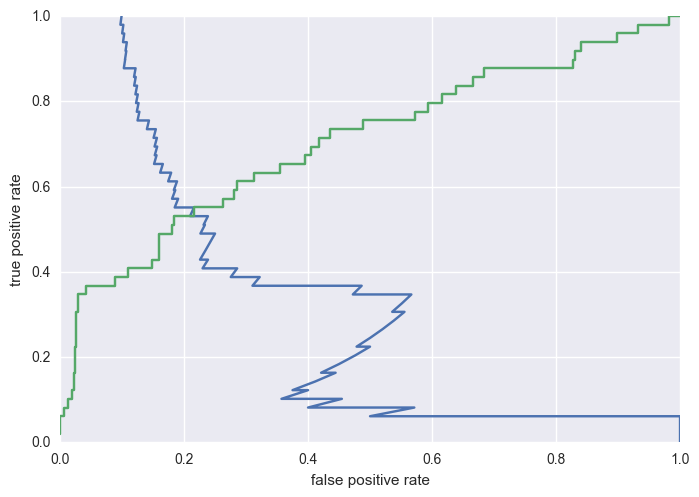

In [88]:
print ("Classifcation Report, 'Married':")
print (cr_svc_m)
from sklearn.metrics import precision_recall_curve
decision_function_m = classifier_svc_m.fit(X_train_pca_m, y_train_m).decision_function(X_test_pca_m)
precision, recall, thresholds = precision_recall_curve(y_test_m, decision_function_m)
plt.plot(precision, recall)
plt.xlabel("precision")
plt.ylabel("recall")

from sklearn.metrics import roc_curve
decision_function_svc_m = classifier_svc_m.fit(X_train_pca_m, y_train_m).decision_function(X_test_pca_m)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_m, decision_function_m)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

KNN - 'Married' data

In [58]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn_m = KNeighborsClassifier(n_neighbors = 315, metric = 'minkowski', p =2 )
classifier_knn_m.fit(X_train_pca_m, y_train_m)

# Predicting the Test set results
y_pred_knn_m = classifier_knn_m.predict(X_test_pca_m)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn_m = confusion_matrix(y_test_m, y_pred_knn_m)

#Classification Report
from sklearn.metrics import classification_report
cr_knn_m = classification_report(y_test_m, y_pred_knn_m)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn_m = confusion_matrix(y_test_m, y_pred_knn_m)

#Classification Report
from sklearn.metrics import classification_report
cr_knn_m = classification_report(y_test_m, y_pred_knn_m)

#ROC Curve

C:\Users\Marvin\Anaconda3.1\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KNearestNeighbors - Confusion Matrix and Heatmap, 'Married' data

Confusion Matrix, 'Married':
[[453   0]
 [ 49   0]]



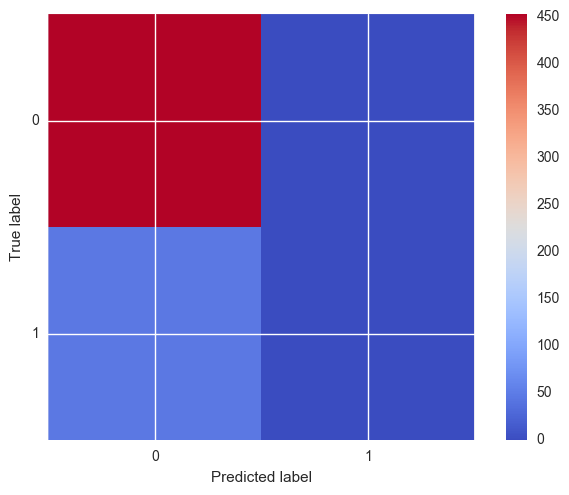

In [59]:
print ("Confusion Matrix, 'Married':")
print (cm_knn_m)
print ('')
plt.imshow(confusion_matrix(y_test_m, y_pred_knn_m), cmap="coolwarm", interpolation="None")
plt.colorbar()
plt.xlabel("Predicted label")
plt.xticks(range(2))
plt.yticks(range(2))
plt.ylabel("True label")

KNearestNeighbors - Classification Report, 'Married' data

In [81]:
print ("Classifcation Report, 'Married':")
print (cr_knn_m)

Classifcation Report, 'Married':
             precision    recall  f1-score   support

          0       0.90      1.00      0.95       453
          1       0.00      0.00      0.00        49

avg / total       0.81      0.90      0.86       502



## Modifying the Model Tree/Estimators.

Random Forest - 'Married' Data Segement.

First Model would have 10 trees and compared to the other models that were substituted with 50 trees.

and 1000 trees respectively.

In [80]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf_m = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf_m.fit(X_train_pca_m, y_train_m)

classifier_rf_m1 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier_rf_m1.fit(X_train_pca_m, y_train_m)

classifier_rf_m2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_rf_m2.fit(X_train_pca_m, y_train_m)

# Predicting the Test set results,
y_pred_rf_m = classifier_rf_m.predict(X_test_pca_m)
y_pred_rf_m1 = classifier_rf_m1.predict(X_test_pca_m)
y_pred_rf_m2 = classifier_rf_m2.predict(X_test_pca_m)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf_m = confusion_matrix(y_test_m, y_pred_rf_m)
cm_rf_m1 = confusion_matrix(y_test_m, y_pred_rf_m1)
cm_rf_m2 = confusion_matrix(y_test_m, y_pred_rf_m2)

#Classification Report
from sklearn.metrics import classification_report
cr_rf_m = classification_report(y_test_m, y_pred_rf_m)
cr_rf_m1 = classification_report(y_test_m, y_pred_rf_m1)
cr_rf_m2 = classification_report(y_test_m, y_pred_rf_m2)

#ROC Curve

## Random Forest Model Evaluation

True Positive Rate or Recall were higher for the model that was based on 100 trees versus the others that had 50 or 10 trees. 
True Negatives Rate or Specificity were lower for the model that was based on 100 trees versus higher scores respectively for models that were based on 50 or 100 trees. 

Random Forest - Confusion Matrix and Heatmap, 'Married' data

Confusion Matrix, 'Married':
[[445   8]
 [ 43   6]]

Confusion Matrix, 'Married':
[[444   9]
 [ 41   8]]

Confusion Matrix, 'Married':
[[443  10]
 [ 39  10]]



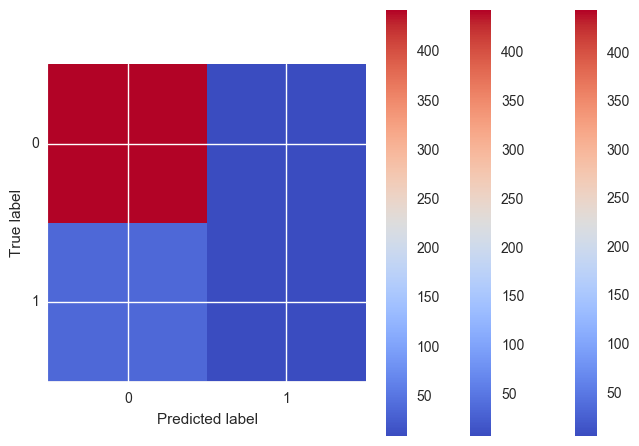

In [82]:
print ("Confusion Matrix, 'Married':")
print (cm_rf_m)
print ('')
plt.imshow(confusion_matrix(y_test_m, y_pred_rf_m), cmap="coolwarm", interpolation="None")
plt.colorbar()
plt.xlabel("Predicted label")
plt.xticks(range(2))
plt.yticks(range(2))
plt.ylabel("True label")

print ("Confusion Matrix, 'Married':")
print (cm_rf_m1)
print ('')
plt.imshow(confusion_matrix(y_test_m, y_pred_rf_m1), cmap="coolwarm", interpolation="None")
plt.colorbar()
plt.xlabel("Predicted label")
plt.xticks(range(2))
plt.yticks(range(2))
plt.ylabel("True label")

print ("Confusion Matrix, 'Married':")
print (cm_rf_m2)
print ('')
plt.imshow(confusion_matrix(y_test_m, y_pred_rf_m2), cmap="coolwarm", interpolation="None")
plt.colorbar()
plt.xlabel("Predicted label")
plt.xticks(range(2))
plt.yticks(range(2))
plt.ylabel("True label")

Random Forest - Classification Report, 'Married' data

In [83]:
print ("Classifcation Report, 'Married':")
print (cr_rf_m)

print ("Classifcation Report, 'Married':")
print (cr_rf_m1)

print ("Classifcation Report, 'Married':")
print (cr_rf_m2)

Classifcation Report, 'Married':
             precision    recall  f1-score   support

          0       0.91      0.98      0.95       453
          1       0.43      0.12      0.19        49

avg / total       0.86      0.90      0.87       502

Classifcation Report, 'Married':
             precision    recall  f1-score   support

          0       0.92      0.98      0.95       453
          1       0.47      0.16      0.24        49

avg / total       0.87      0.90      0.88       502

Classifcation Report, 'Married':
             precision    recall  f1-score   support

          0       0.92      0.98      0.95       453
          1       0.50      0.20      0.29        49

avg / total       0.88      0.90      0.88       502



### Scaling features and applying Principal Component Analysis to remedy high dimensionality in our 'Non-Married' data set

In [65]:
# Feature Scaling; don't need to worry about this for 'Random Forest'
from sklearn.preprocessing import StandardScaler
sc_nm = StandardScaler()
X_train_sc_nm = sc_nm.fit_transform(X_train_nm)
X_test_sc_nm = sc_nm.transform(X_test_nm)

#Applying PCA
from sklearn.decomposition import PCA
pca_nm = PCA(n_components = 8)
X_train_pca_nm = pca_nm.fit_transform(X_train_sc_nm)
X_test_pca_nm = pca_nm.transform(X_test_sc_nm)
explained_variance_pca_nm = pca_nm.explained_variance_ratio_
print ("Explained Variance from PCA, 'Non-Married':",explained_variance_pca_m)
print ("Explained Variance from PCA Ratio, 'Non-Married':",pca_nm.explained_variance_ratio_)
print ("Explained Variance from PCA Ratio Sum, 'Non-Married':",pca_nm.explained_variance_ratio_.cumsum())

Explained Variance from PCA, 'Non-Married': [ 0.07422905  0.04882593  0.04431823  0.03812304  0.03693472  0.03210683]
Explained Variance from PCA Ratio, 'Non-Married': [ 0.07125792  0.04763646  0.0420021   0.04060823  0.03497959  0.03365615
  0.03129506  0.02861373]
Explained Variance from PCA Ratio Sum, 'Non-Married': [ 0.07125792  0.11889438  0.16089648  0.20150471  0.2364843   0.27014046
  0.30143552  0.33004925]


### Following is SVC, KNN, And Random Forest Models for 'Non-Married' data set

SVC - 'Non-Married' data

In [66]:
# Applying classifier SVC to Training set on 'Non-Married' data
from sklearn.svm import SVC
classifier_svc_nm = SVC(kernel = 'rbf', random_state = 0)
classifier_svc_nm.fit(X_train_pca_nm, y_train_nm)

# Predicting the Test set results
y_pred_svc_nm = classifier_svc_nm.predict(X_test_pca_nm)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svc_nm = confusion_matrix(y_test_nm, y_pred_svc_nm)

#Classification Report
from sklearn.metrics import classification_report
cr_svc_nm = classification_report(y_test_nm, y_pred_svc_nm)

#ROC Curve

Support Vector Machine - Confusion Matrix and Heatmap, 'Non-Married' data

Confusion Matrix, 'Non-Married':
[[283   1]
 [ 35   3]]



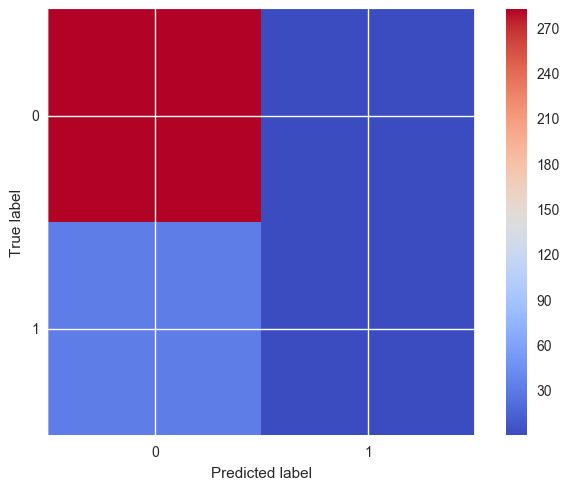

In [67]:
print ("Confusion Matrix, 'Non-Married':")
print (cm_svc_nm)
print ('')
plt.imshow(confusion_matrix(y_test_nm, y_pred_svc_nm), cmap="coolwarm", interpolation="None")
plt.colorbar()
plt.xlabel("Predicted label")
plt.xticks(range(2))
plt.yticks(range(2))
plt.ylabel("True label")

Support Vector Machines - Classification Report, 'Married' data

Classification Report, 'Non-Married':
             precision    recall  f1-score   support

          0       0.89      1.00      0.94       284
          1       0.75      0.08      0.14        38

avg / total       0.87      0.89      0.85       322



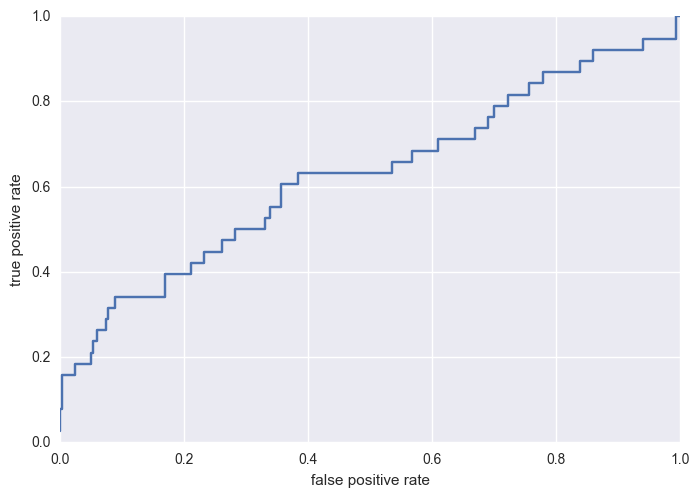

In [68]:
print ("Classification Report, 'Non-Married':")
print (cr_svc_nm)
from sklearn.metrics import roc_curve
decision_function_nm = classifier_svc_nm.fit(X_train_pca_nm, y_train_nm).decision_function(X_test_pca_nm)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_nm, decision_function_nm)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

KNN - 'Non-Married' data

In [69]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn_nm = KNeighborsClassifier(n_neighbors = 315, metric = 'euclidean', p =2 )
classifier_knn_nm.fit(X_train_pca_nm, y_train_nm)

# Predicting the Test set results
y_pred_knn_nm = classifier_knn_nm.predict(X_test_pca_nm)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn_nm = confusion_matrix(y_test_nm, y_pred_knn_nm)

#Classification Report
from sklearn.metrics import classification_report
cr_knn_nm = classification_report(y_test_nm, y_pred_knn_nm)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn_nm = confusion_matrix(y_test_nm, y_pred_knn_nm)

#Classification Report
from sklearn.metrics import classification_report
cr_knn_nm = classification_report(y_test_nm, y_pred_knn_nm)

#ROC Curve

C:\Users\Marvin\Anaconda3.1\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KNearestNeighbors - Confusion Matrix and Heatmap, 'Non-Married' data

Confusion Matrix, 'Non-Married':
[[284   0]
 [ 38   0]]



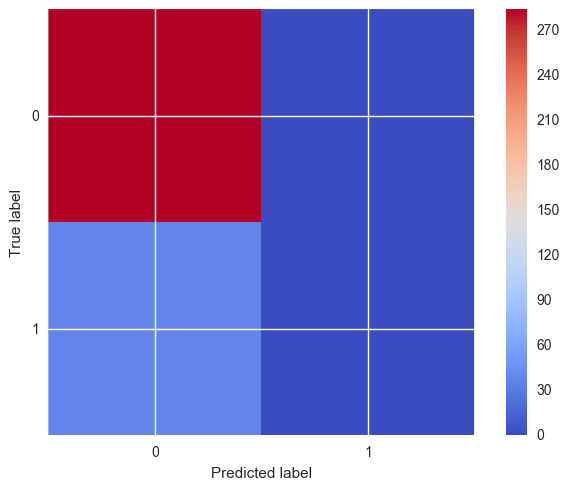

In [70]:
print ("Confusion Matrix, 'Non-Married':")
print (cm_knn_nm)
print ('')
plt.imshow(confusion_matrix(y_test_nm, y_pred_knn_nm), cmap="coolwarm", interpolation="None")
plt.colorbar()
plt.xlabel("Predicted label")
plt.xticks(range(2))
plt.yticks(range(2))
plt.ylabel("True label")

KNearestNeighbors - Classification Report, 'Non-Married' data

In [71]:
print ("Classifcation Report, 'Non-Married':")
print (cr_knn_nm)

Classifcation Report, 'Non-Married':
             precision    recall  f1-score   support

          0       0.88      1.00      0.94       284
          1       0.00      0.00      0.00        38

avg / total       0.78      0.88      0.83       322



Random Forest - 'Non-Married' data

In [72]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf_nm = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier_rf_nm.fit(X_train_pca_nm, y_train_nm)

# Predicting the Test set results
y_pred_rf_nm = classifier_rf_nm.predict(X_test_pca_nm)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf_nm = confusion_matrix(y_test_nm, y_pred_rf_nm)

#Classification Report
from sklearn.metrics import classification_report
cr_rf_nm = classification_report(y_test_nm, y_pred_rf_nm)

#ROC Curve

Random Forest - Confusion Matrix and Heatmap, 'Married' data

Confusion Matrix, 'Non-Married':
[[281   3]
 [ 33   5]]



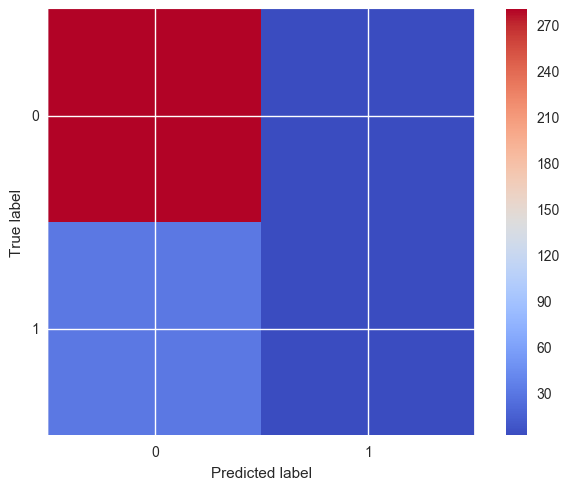

In [73]:
print ("Confusion Matrix, 'Non-Married':")
print (cm_rf_nm)
print ('')
plt.imshow(confusion_matrix(y_test_nm, y_pred_rf_nm), cmap="coolwarm", interpolation="None")
plt.colorbar()
plt.xlabel("Predicted label")
plt.xticks(range(2))
plt.yticks(range(2))
plt.ylabel("True label")

Random Forest - Classification Report, 'Married' data

In [74]:
print ("Classifcation Report, 'Non-Married':")
print (cr_rf_nm)

Classifcation Report, 'Non-Married':
             precision    recall  f1-score   support

          0       0.89      0.99      0.94       284
          1       0.62      0.13      0.22        38

avg / total       0.86      0.89      0.85       322



### Modeling and evaluation - Part 4 (Salomon)
Rubric: "Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model."

Text to be added...

### Modeling and evaluation - Part 5 (Salomon)
Rubric: "Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.:

Text to be added...

### Modeling and Evaluation - Part 6 (Earl)
Rubric: "Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task."

Text to be added...

### Deployment (Marvin)

This model indeed would be useful for organizations that may be interested to evalute the likelihood of subject groups participation to subsrcibe to term deposits. In fact, this model though not perfect, can mitigate risk, expenses and offer decision making assistance for marketing or mailing campaigns. Evaluation of the Models can be guage by continuous testing with newer inputs that can help measure how well each model predicts. Accuracy scores is a great indicator for measuring True or False Positve predictions, our model can also be gauge by the sensitivity or specificty and the importance of either is sometimes dependant on the business or organization's strategy. The idea of convincing stakeholders that our model is reliable must be conveyed honestly and not without properly evaluating the model with frequent test data. This should be done daily/weekly however depends on goals of the establishment. 

### Exceptional Work (Scott)
Rubric: "You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?"
Text to be added...